# Some True Measures
In this notebook we explore some of the new, lesser-known, `TrueMeasure` instancees in QMCPy. Specifically, we look at the Kumaraswamy, Continuous Bernoulli, and Johnson's $S_U$ measures.

## Mathematics

Denote by $f$ the 1 dimensional PDF, $F$ the 1 dimensional CDF, and $\Psi=F^{-1}$ the inverse CDF transform that takes samples mimicking $\mathcal{U}[0,1]$ to mimic the desired 1 dimensional true measure. For each of these true measures we assume the dimensions are independent, so the density and CDF and computed by taking the product across dimensions and the inverse transform is applied elementwise.

**[Kumaraswamy](https://en.wikipedia.org/wiki/Kumaraswamy_distribution)**

Parameters $a,b>0$
$$f(x) = a b x^{a-1}(1-x^{a})^{b-1}$$
$$F(x) = 1-(1-x^{a})^{b}$$
$$\Psi(x) = (1-(1-x)^{1/b})^{1/a}$$
$$\Psi'(x) = \frac{\left(1-\left(1-x\right)^{1/b}\right)^{1/a-1}(1-x)^{1/b-1}}{ab}$$
    
**[Continuous Bernoulli](https://en.wikipedia.org/wiki/Continuous_Bernoulli_distribution)**

Parameter $\lambda \in (0,1)$ 

If $\lambda=1/2$, then 
$$f(x) = 2\lambda^x(1-\lambda)^{(1-x)}$$
$$F(x) = x$$
$$\Psi(x) = x$$
$$\Psi'(x) = 1$$

If $\lambda \neq 1/2$, then 
$$f(x) = \frac{2\tanh^{-1}(1-2\lambda)}{1-2\lambda} \lambda^x(1-\lambda)^{(1-x)}$$
$$F(x) = \frac{\lambda^x(1-\lambda)^{(1-x)}+\lambda-1}{2\lambda-1}$$
$$\Psi(x) = \log\left(\frac{(2\lambda-1)x-\lambda+1}{1-\lambda}\right) \,/\, \log\left(\frac{\lambda}{1-\lambda}\right)$$
$$\Psi'(x) = \frac{1}{\log(\lambda/(1-\lambda))} \cdot \frac{2\lambda-1}{(2\lambda-1)x-\lambda+1}$$

**[Johnson's $S_U$](https://en.wikipedia.org/wiki/Johnson%27s_SU-distribution)**

Parameters $\gamma,\xi,\delta>0,\lambda>0$
$$f(x) = \frac{\delta\exp\left(-\frac{1}{2}\left(\gamma+\delta\sinh^{-1}\left(\frac{x-\xi}{\lambda}\right)\right)^2\right)}{\lambda\sqrt{2\pi\left(1+\left(\frac{x-\xi}{\lambda}\right)^2\right)}}$$
$$F(x) = \Phi\left(\gamma+\delta\sinh^{-1}\left(\frac{x-\xi}{\lambda}\right)\right)$$
$$\Psi(x) = \lambda \sinh\left(\frac{\Phi^{-1}(x)-\gamma}{\delta}\right) + \xi$$
$$\Psi'(x) = \frac{\lambda}{\delta}\cosh\left(\frac{\Phi^{-1}(x)-\gamma}{\delta}\right) \,/\, \phi\left(\Phi^{-1}(x)\right)$$
where $\phi$ is the standard normal PDF and $\Phi$ is the standard normal CDF.

## Imports

In [1]:
from qmcpy import *
from scipy.special import gamma
from numpy import *

In [2]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.rc('font', size=16)          # controls default text sizes
pyplot.rc('axes', titlesize=16)     # fontsize of the axes title
pyplot.rc('axes', labelsize=16)     # fontsize of the x and y labels
pyplot.rc('xtick', labelsize=16)    # fontsize of the tick labels
pyplot.rc('ytick', labelsize=16)    # fontsize of the tick labels
pyplot.rc('legend', fontsize=16)    # legend fontsize
pyplot.rc('figure', titlesize=16)   # fontsize of the figure title

## 1D Density Plot

In [3]:
def plt_1d(tm,lim,ax):
    print(tm)
    n_mesh = 100
    ticks = linspace(*lim,n_mesh)
    y = tm._weight(ticks[:,None])
    ax.plot(ticks,y)
    ax.set_xlim(lim)
    ax.set_xlabel("$T$")
    ax.set_xticks(lim)    
    ax.set_title(type(tm).__name__)

Kumaraswamy (TrueMeasure Object)
    a               2^(1)
    b               2^(2)
BernoulliCont (TrueMeasure Object)
    lam             0.750
JohnsonsSU (TrueMeasure Object)
    gamma           1
    xi              2^(1)
    delta           1
    lam             2^(1)


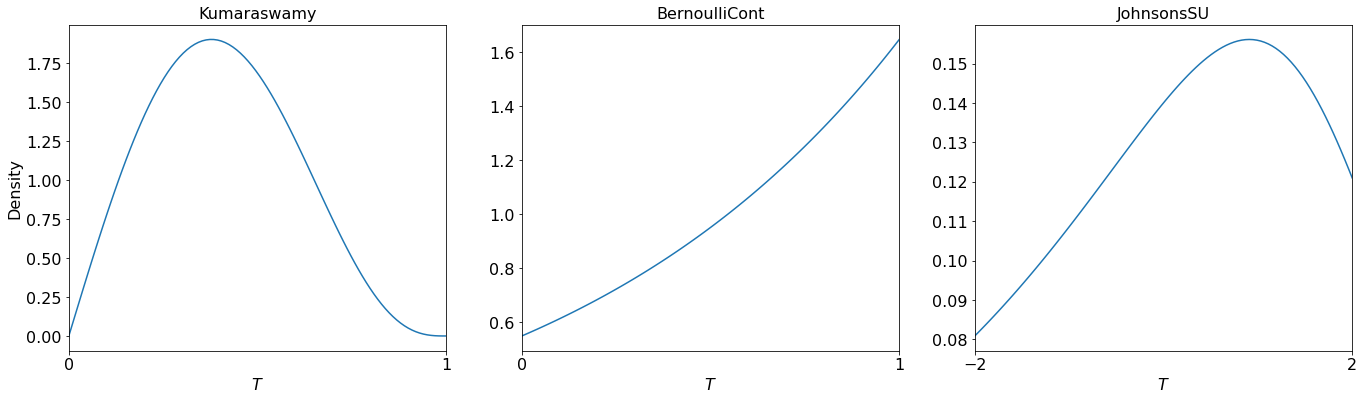

In [4]:
fig,ax = pyplot.subplots(figsize=(23,6),nrows=1,ncols=3)
sobol = Sobol(1)
kumaraswamy = Kumaraswamy(sobol,a=2,b=4)
plt_1d(kumaraswamy,lim=[0,1],ax=ax[0])
bern = BernoulliCont(sobol,lam=.75)
plt_1d(bern,lim=[0,1],ax=ax[1])
jsu = JohnsonsSU(sobol,gamma=1,xi=2,delta=1,lam=2)
plt_1d(jsu,lim=[-2,2],ax=ax[2])
ax[0].set_ylabel("Density");

## 2D Density Plot

In [5]:
def plt_2d(tm,n,lim,ax):
    print(tm)
    n_mesh = 502
    # Points
    t = tm.gen_samples(n)
    # PDF
    mesh = zeros(((n_mesh)**2,3),dtype=float)
    grid_tics = linspace(*lim,n_mesh)
    x_mesh,y_mesh = meshgrid(grid_tics,grid_tics)
    mesh[:,0] = x_mesh.flatten()
    mesh[:,1] = y_mesh.flatten()
    mesh[:,2] = tm._weight(mesh[:,:2])
    z_mesh = mesh[:,2].reshape((n_mesh,n_mesh))
    #   colors 
    clevel = arange(mesh[:,2].min(),mesh[:,2].max(),.025)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [(.95,.95,.95),(0,0,1)]) 
    # cmap = pyplot.get_cmap('Blues')
    #   contour + scatter plot
    ax.contourf(x_mesh,y_mesh,z_mesh,clevel,cmap=cmap,extend='both')
    ax.scatter(t[:,0],t[:,1],s=5,color='w')
    #   axis
    for nsew in ['top','bottom','left','right']: ax.spines[nsew].set_visible(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    ax.set_aspect(1)
    ax.set_xlim(lim)
    ax.set_xticks(lim)
    ax.set_ylim(lim)
    ax.set_yticks(lim)
    #   labels
    ax.set_xlabel('$T_1$')
    ax.set_ylabel('$T_2$')
    ax.set_title('%s PDF and Random Samples'%type(tm).__name__)
    #   metas
    fig.tight_layout()

Kumaraswamy (TrueMeasure Object)
    a               [2 3]
    b               [3 5]
BernoulliCont (TrueMeasure Object)
    lam             [0.25 0.75]
JohnsonsSU (TrueMeasure Object)
    gamma           [1 1]
    xi              [1 1]
    delta           [1 1]
    lam             [1 1]


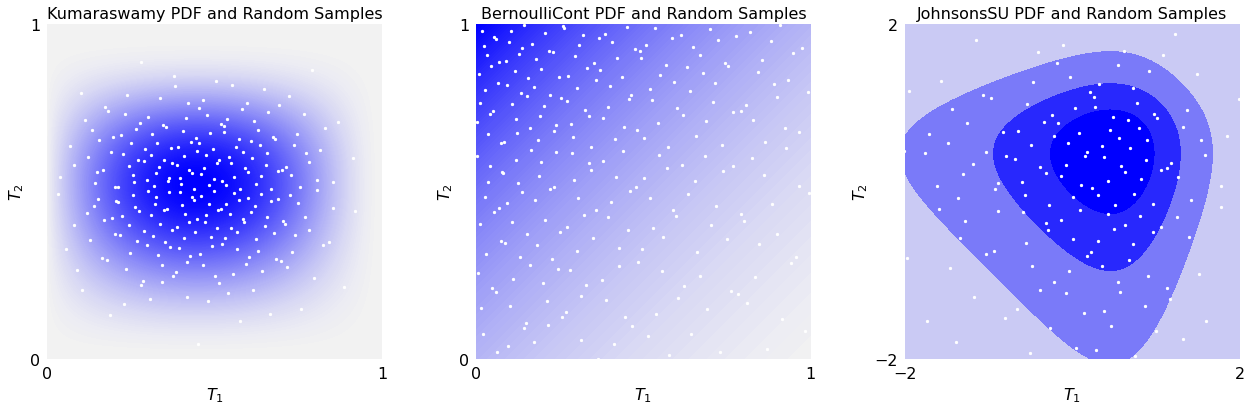

In [6]:
fig,ax = pyplot.subplots(figsize=(18,6),nrows=1,ncols=3)
sobol = Sobol(2)
kumaraswamy = Kumaraswamy(sobol,a=[2,3],b=[3,5])
plt_2d(kumaraswamy,n=2**8,lim=[0,1],ax=ax[0])
bern = BernoulliCont(sobol,lam=[.25,.75])
plt_2d(bern,n=2**8,lim=[0,1],ax=ax[1])
jsu = JohnsonsSU(sobol,gamma=[1,1],xi=[1,1],delta=[1,1],lam=[1,1])
plt_2d(jsu,n=2**8,lim=[-2,2],ax=ax[2])

## 1D Expected Values

In [7]:
def compute_expected_val(tm,true_value,abs_tol):
    if tm.d!=1: raise Exception("tm must be 1 dimensional for this test")
    cf = CustomFun(tm, g=lambda x:x)
    sol,data = CubQMCSobolG(cf,abs_tol=abs_tol).integrate()
    error = abs(true_value-sol)
    if error>abs_tol: 
        raise Exception("QMC error %.3f not within tolerance."%error)
    print("%s integration within tolerance"%type(tm).__name__)
    print("\tEstimated mean: %.4f"%sol)
    print("\t%s"%str(tm).replace('\n','\n\t'))

In [8]:
abs_tol = 1e-5
# kumaraswamy 
a,b = 2,6
kuma = Kumaraswamy(Sobol(1),a,b)
kuma_tv = b*gamma(1+1/a)*gamma(b)/gamma(1+1/a+b)
compute_expected_val(kuma,kuma_tv,abs_tol)
# Continuous Bernoulli
lam = .75
bern = BernoulliCont(Sobol(1),lam=lam)
bern_tv = 1/2 if lam==1/2 else lam/(2*lam-1)+1/(2*arctanh(1-2*lam))
compute_expected_val(bern,bern_tv,abs_tol)
# Johnson's SU
_gamma,xi,delta,lam = 1,2,3,4
jsu = JohnsonsSU(Sobol(1),gamma=_gamma,xi=xi,delta=delta,lam=lam)
jsu_tv = xi-lam*exp(1/(2*delta**2))*sinh(_gamma/delta)
compute_expected_val(jsu,jsu_tv,abs_tol)

Kumaraswamy integration within tolerance
	Estimated mean: 0.3410
	Kumaraswamy (TrueMeasure Object)
	    a               2^(1)
	    b               6
BernoulliCont integration within tolerance
	Estimated mean: 0.5898
	BernoulliCont (TrueMeasure Object)
	    lam             0.750
JohnsonsSU integration within tolerance
	Estimated mean: 0.5642
	JohnsonsSU (TrueMeasure Object)
	    gamma           1
	    xi              2^(1)
	    delta           3
	    lam             2^(2)


## Importance Samling with a Single Kumaraswamy

In [9]:
# compose with a Kumaraswamy transformation
abs_tol = 1e-4
cf = CustomFun(Uniform(Kumaraswamy(Sobol(1,seed=7),a=.5,b=.5)), g=lambda x:x)
sol,data = CubQMCSobolG(cf,abs_tol=abs_tol).integrate() 
print(data)
true_val = .5 # expected value of standard uniform
error = abs(true_val-sol)
if error>abs_tol: raise Exception("QMC error %.3f not within tolerance."%error)

Solution: 0.5000         
CustomFun (Integrand Object)
Sobol (DiscreteDistribution Object)
    d               1
    randomize       1
    graycode        0
    seed            7
    mimics          StdUniform
    dim0            0
Uniform (TrueMeasure Object)
    lower_bound     0
    upper_bound     1
    transform       Kumaraswamy (TrueMeasure Object)
                       a               2^(-1)
                       b               2^(-1)
CubQMCSobolG (StoppingCriterion Object)
    abs_tol         1.00e-04
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
LDTransformData (AccumulateData Object)
    n_total         2^(11)
    solution        0.500
    error_bound     1.27e-05
    time_integrate  0.002


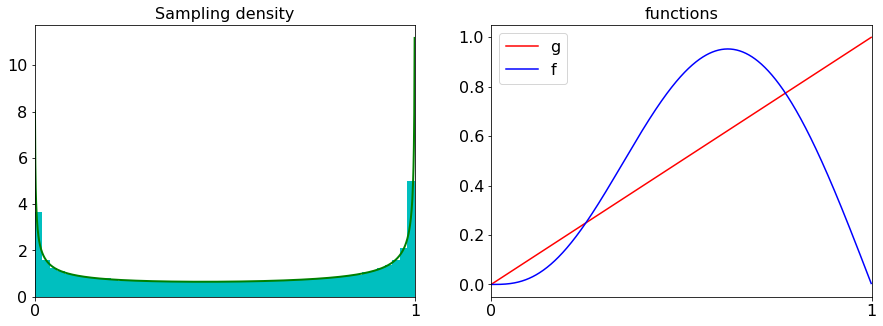

In [10]:
# plot the above functions
x = linspace(0,1,1000).reshape(-1,1)
x = x[1:-1] # plotting locations
# plot
fig,ax = pyplot.subplots(ncols=2,figsize=(15,5))
#    density
rho = cf.true_measure.transform._weight(x)
tfvals = cf.true_measure.transform._transform_r(x)
ax[0].hist(tfvals,density=True,bins=50,color='c')
ax[0].plot(x,rho,color='g',linewidth=2)
ax[0].set_title('Sampling density')
#    functions
gs = cf.g(x)
fs = cf.f(x)
ax[1].plot(x,gs,color='r',label='g')
ax[1].plot(x,fs,color='b',label='f')
ax[1].legend()
ax[1].set_title('functions');
# metas
for i in range(2):
    ax[i].set_xlim([0,1])
    ax[i].set_xticks([0,1])

## Importance Sampling with 2 (Composed) Kumaraswamys

In [11]:
# compose multiple Kumaraswamy distributions
abs_tol = 1e-3
dd = Sobol(1,seed=7)
t1 = Kumaraswamy(dd,a=.5,b=.5) # first transformation
t2 = Kumaraswamy(t1,a=5,b=2) # second transformation
cf = CustomFun(Uniform(t2), g=lambda x:x)
sol,data = CubQMCSobolG(cf,abs_tol=abs_tol).integrate() # expected value of standard uniform
print(data)
true_val = .5
error = abs(true_val-sol)
if error>abs_tol: raise Exception("QMC error %.3f not within tolerance."%error)

Solution: 0.4999         
CustomFun (Integrand Object)
Sobol (DiscreteDistribution Object)
    d               1
    randomize       1
    graycode        0
    seed            7
    mimics          StdUniform
    dim0            0
Uniform (TrueMeasure Object)
    lower_bound     0
    upper_bound     1
    transform       Kumaraswamy (TrueMeasure Object)
                       a               5
                       b               2^(1)
                       transform       Kumaraswamy (TrueMeasure Object)
                                          a               2^(-1)
                                          b               2^(-1)
CubQMCSobolG (StoppingCriterion Object)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
LDTransformData (AccumulateData Object)
    n_total         2^(11)
    solution        0.500
    error_bound     5.32e-04
    time_integrate  0.003


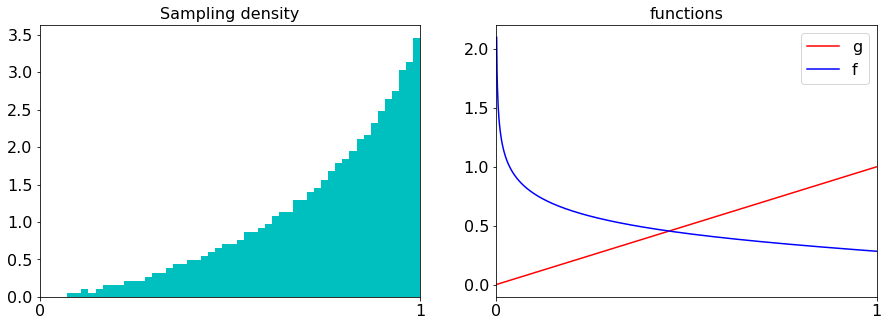

In [12]:
x = linspace(0,1,1000).reshape(-1,1)
x = x[1:-1] # plotting locations
# plot
fig,ax = pyplot.subplots(ncols=2,figsize=(15,5))
#    density
tfvals = cf.true_measure.transform._transform_r(x)
ax[0].hist(tfvals,density=True,bins=50,color='c')
ax[0].set_title('Sampling density')
#    functions
gs = cf.g(x)
fs = cf.f(x)
ax[1].plot(x,gs,color='r',label='g')
ax[1].plot(x,fs,color='b',label='f')
ax[1].legend()
for i in range(2):
    ax[i].set_xlim([0,1])
    ax[i].set_xticks([0,1])
ax[1].set_title('functions');

## Can we Improve the Keister function?

In [25]:
abs_tol = 1e-4
d = 1

In [26]:
# standard method
keister_std = Keister(Sobol(d))
sol_std,data_std = CubQMCSobolG(keister_std,abs_tol=abs_tol).integrate()
print("Standard method estimate of %.4f took %.2e seconds and %.2e samples"%\
      (sol_std,data_std.time_integrate,data_std.n_total))
print(keister_std.true_measure)

Standard method estimate of 1.3804 took 1.07e-02 seconds and 1.64e+04 samples
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     pca


In [27]:
# Kumaraswamy importance sampling
dd = Sobol(d,seed=7)
t1 = Kumaraswamy(dd,a=.8,b=.8) # first transformation
t2 = Gaussian(t1)
keister_kuma = Keister(t2)
sol_kuma,data_kuma = CubQMCSobolG(keister_kuma,abs_tol=abs_tol).integrate() 
print("Kumaraswamy IS estimate of %.4f took %.2e seconds and %.2e samples"%\
      (sol_kuma,data_kuma.time_integrate,data_kuma.n_total))
t_frac = data_kuma.time_integrate/data_std.time_integrate
n_frac = data_kuma.n_total/data_std.n_total
print('That is %.1f%% of the time and %.1f%% of the samples compared to default keister.'%(t_frac*100,n_frac*100))
print(keister_kuma.true_measure)

Kumaraswamy IS estimate of 1.3804 took 3.93e-03 seconds and 2.05e+03 samples
That is 36.7% of the time and 12.5% of the samples compared to default keister.
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     pca
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      1
                       decomp_type     pca
                       transform       Kumaraswamy (TrueMeasure Object)
                                          a               0.800
                                          b               0.800


In [30]:
# Continuous Bernoulli importance sampling
dd = Sobol(d,seed=7)
t1 = BernoulliCont(dd,lam=.25) # first transformation
#t2 = BernoulliCont(t1,lam=.75) # first transformation
t3 = Gaussian(t1)
keister_cb = Keister(t3)
sol_cb,data_cb = CubQMCSobolG(keister_cb,abs_tol=abs_tol).integrate() 
print("Continuous Bernoulli IS estimate of %.4f took %.2e seconds and %.2e samples"%\
      (sol_cb,data_cb.time_integrate,data_cb.n_total))
t_frac = data_cb.time_integrate/data_std.time_integrate
n_frac = data_cb.n_total/data_std.n_total
print('That is %.1f%% of the time and %.1f%% of the samples compared to default keister.'%(t_frac*100,n_frac*100))
print(keister_cb.true_measure)

Continuous Bernoulli IS estimate of 1.3804 took 8.84e-03 seconds and 8.19e+03 samples
That is 82.5% of the time and 50.0% of the samples compared to default keister.
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     pca
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      1
                       decomp_type     pca
                       transform       BernoulliCont (TrueMeasure Object)
                                          lam             2^(-2)


In [39]:
#  Kumaraswamy importance sampling
dd = Sobol(d,seed=7)
t1 = JohnsonsSU(dd,xi=2,delta=1,gamma=2,lam=1) # first transformation
keister_jsu = Keister(t1)
sol_jsu,data_jsu = CubQMCSobolG(keister_jsu,abs_tol=abs_tol).integrate() 
print("Kumaraswamy IS estimate of %.4f took %.2e seconds and %.2e samples"%\
      (sol_jsu,data_jsu.time_integrate,data_jsu.n_total))
t_frac = data_jsu.time_integrate/data_std.time_integrate
n_frac = data_jsu.n_total/data_std.n_total
print('That is %.1f%% of the time and %.1f%% of the samples compared to default keister.'%(t_frac*100,n_frac*100))
print(keister_jsu.true_measure)

Kumaraswamy IS estimate of 1.3804 took 9.11e-03 seconds and 8.19e+03 samples
That is 85.0% of the time and 50.0% of the samples compared to default keister.
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     pca
    transform       JohnsonsSU (TrueMeasure Object)
                       gamma           2^(1)
                       xi              2^(1)
                       delta           1
                       lam             1


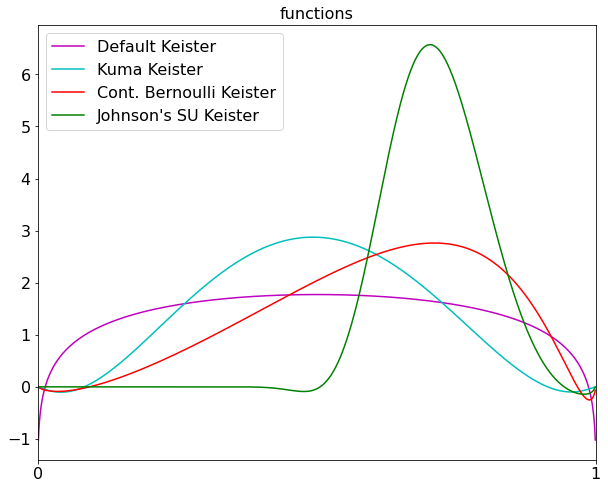

In [40]:
x = linspace(0,1,1000).reshape(-1,1)
x = x[1:-1] # plotting locations
# plot
fig,ax = pyplot.subplots(figsize=(10,8))
#    functions
fs = [keister_std.f,keister_kuma.f,keister_cb.f,keister_jsu.f]
labels = ['Default Keister','Kuma Keister','Cont. Bernoulli Keister',"Johnson's SU Keister"]
colors = ['m','c','r','g']
for f,label,color in zip(fs,labels,colors): ax.plot(x,f(x),color=color,label=label)
ax.legend()
ax.set_xlim([0,1])
ax.set_xticks([0,1])
ax.set_title('functions');